Taller 4 - métodos computacionales 2

Silvana Archila y Catalina Fuentes

1. Ecuación de Poisson en un disco

c:\Users\Catalina Fuentes\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


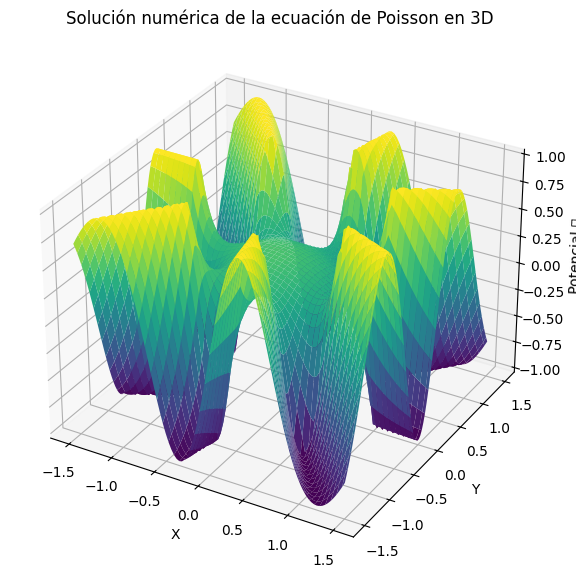

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Defino parámetros
N = 100
delta = (1/(N))**2  #espaciado entre puntos al cuadrado
x = np.linspace(-1.5, 1.5, N)
y = np.linspace(-1.5, 1.5, N)
convergencia = 10**(-4)

phi = np.zeros((N, N))
phi_new = np.zeros((N, N))

#Pongo condiciones iniciales
for i in range(N):
    for j in range(N):
        if x[i]**2 + y[j]**2 > 1:  
            phi[i, j] = np.sin(7 * np.arctan2(y[j], x[i]))  #condición de frontera
        else:
            phi[i, j] = np.random.random()  
            
#Resuelvo ecuación diferencial
for t in range(500):  
    for i in range(1, N-1):  #ojo, evitar bordes
        for j in range(1, N-1):
            if x[i]**2 + y[j]**2 < 1:  #solo actualizar dentro del círculo
                rho = -x[i] - y[j]
                phi_new[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + 4* delta * np.pi  * rho) / 4

    #Aplicar condicion de frontera otra vez
    for i in range(N):
        for j in range(N):
            if x[i]**2 + y[j]**2 > 1: 
                phi_new[i, j] = np.sin(7 * np.arctan2(y[j], x[i]))

    #Criterio de convergencia
    if np.max(np.abs(phi_new - phi)) < convergencia:
        break

    # Actualizo phi
    phi = phi_new.copy()

#Grafico  en 3D
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, phi_new, cmap='viridis')
ax.set_title('Solución numérica de la ecuación de Poisson en 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potencial 𝜙')
plt.show()



4. Ecuación de onda bidimensional

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

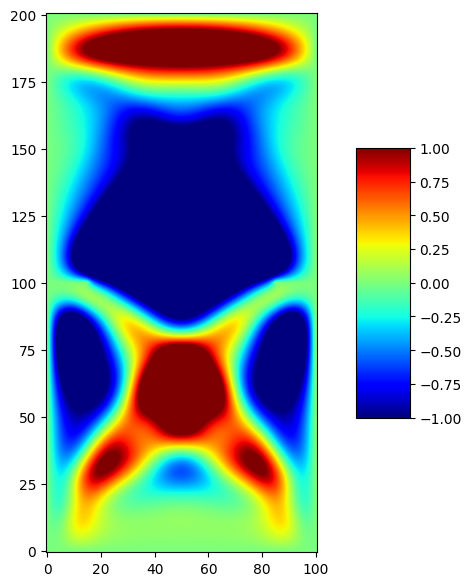

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#Parámetros
dx = 0.01  
dy = 0.01  
dt = 0.01 
c = 0.5  
tmax = 2.0 
xmax = 2.0  
ymax = 1.0  

#Numero de celdas
nx = int(xmax/dx) + 1
ny = int(ymax/dy) + 1 
nt = int(tmax/dt) + 1

#Variables
x = np.linspace(0, xmax, nx)
y = np.linspace(0, ymax, ny)
u = np.zeros((nx, ny))  #u actual
u_new = np.zeros((nx, ny))  #u futuro
u_old = np.zeros((nx, ny))  #u pasado

#Pongo condición inicial: gaussiana
for i in range(nx):
    for j in range(ny):
        u[i, j] = np.exp(-150 * ((x[i] - 0.4)**2 + (y[j] - 0.5)**2))

#Condiciones de frontera 
def condiciones_frontera(u):
    u[0, :] = 0  #x=0
    u[-1, :] = 0  # x=xmax
    u[:, 0] = 0  #y=0
    u[:, -1] = 0  #y=ymax

#Pared
    for i in range(nx):
        for j in range(ny):
            if (0 < y[j] < 0.16) and (0.99 < x[i] < 1.01):
                u[i, j] = 0
    for i in range(nx):
        for j in range(ny):
            if (0.84 < y[j] < 1) and (0.99 < x[i] < 1.01):
                u[i, j] = 0

    return u

#Animación
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.imshow(u, interpolation='bilinear', cmap='jet', origin='lower', vmin=-1, vmax=1)
fig.colorbar(cax, ax=ax, shrink=0.5, aspect=5)

#Actualizar cada frame
def update_plot(frame): 
    global u, u_new, u_old
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = (2 * u[i, j] - u_old[i, j] +
                           (c * dt/dx) ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                           (c * dt/dy) ** 2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))

    u_old = u.copy()
    u = u_new.copy()
    
    condiciones_frontera(u)

    #actualizar gráfica
    cax.set_data(u)
    return cax,

ani = animation.FuncAnimation(fig, update_plot, frames=nt, interval=50, blit=True)
ani.save('simulacion_onda_2D_2d.mp4', writer='ffmpeg')

plt.show()
